In [3]:
library(fpp2);

Loading required package: ggplot2
Loading required package: forecast
Loading required package: fma
Loading required package: expsmooth


In [4]:
Y_in <- read.csv("./R/B1GQ.csv")

In [5]:
Y = ts(Y_in$Value, start = c(1995, 2), frequency = 4)

In [6]:
Y

        Qtr1    Qtr2    Qtr3    Qtr4
1995         33762.1 34184.0 34338.6
1996 34588.9 34795.7 35231.9 35746.7
1997 35885.4 36424.6 36754.1 37251.8
1998 37499.3 38032.5 38590.7 39052.6
1999 39342.5 39861.6 40070.2 40422.2
2000 40691.6 41598.7 41356.7 41935.7
2001 42254.1 42153.7 42512.3 42566.5
2002 43160.9 43271.3 43075.3 42812.9
2003 42543.9 42570.2 42229.5 42545.5
2004 42754.2 43144.8 43406.8 43353.6
2005 43275.6 43603.1 43785.8 43514.5
2006 43605.4 43955.1 44363.4 44287.5
2007 44613.0 45111.6 45288.3 45367.2
2008 45868.2 45881.4 45646.5 45540.7
2009 44928.6 43895.2 43954.1 44365.3
2010 44362.6 44785.4 45035.8 45117.3
2011 44991.4 44653.3 44449.9 44118.7
2012 43420.9 43232.5 42639.9 42173.2
2013 41481.5 41607.7 41902.1 41851.6
2014 42249.9 42041.5 42214.3 42290.0
2015 42562.5 42851.9 43022.0 43083.1
2016 43232.6 43412.6 43583.1 44083.1
2017 44426.6 44755.5 44926.5 45183.7
2018 45545.3 45729.4 46003.5        

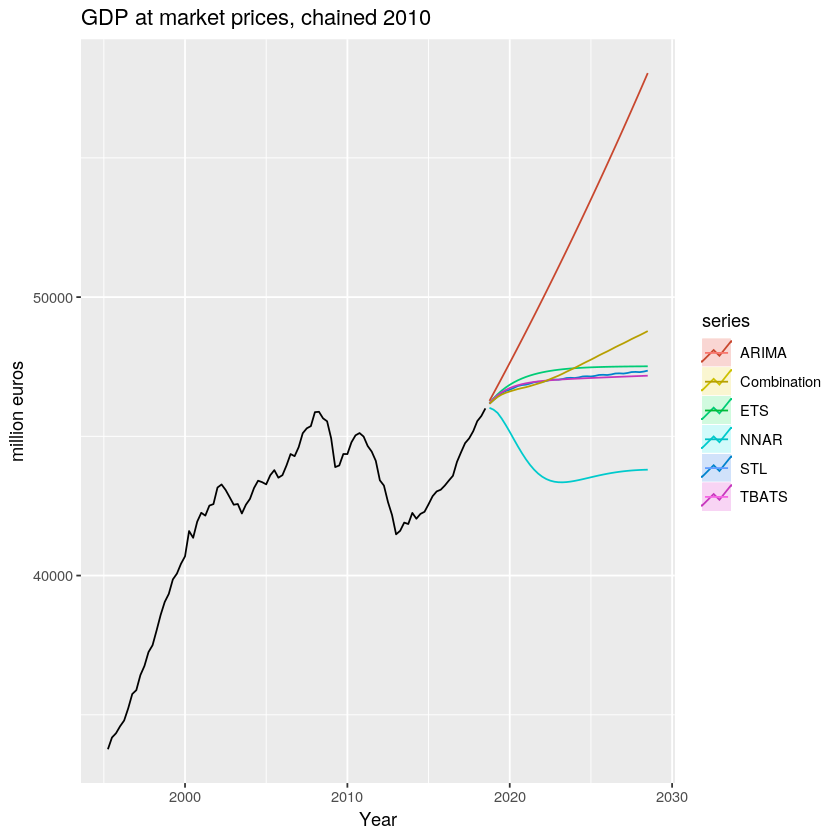

In [11]:
auscafe <- Y
train <- auscafe#window(auscafe, end=c(2012,9))
h <- 40#length(auscafe) - length(train)
ETS <- forecast(ets(train), h=h)
ARIMA <- forecast(auto.arima(train, lambda=0, biasadj=TRUE), h=h)
STL <- stlf(train, lambda=0, h=h, biasadj=TRUE)
NNAR <- forecast(nnetar(train), h=h)
TBATS <- forecast(tbats(train, biasadj=TRUE), h=h)
Combination <- (ETS[["mean"]] + ARIMA[["mean"]] +
  STL[["mean"]] + NNAR[["mean"]] + TBATS[["mean"]])/5

autoplot(auscafe)+#window(auscafe, start=c(2017,1))) +
  autolayer(ETS, series="ETS", PI=FALSE) +
  autolayer(ARIMA, series="ARIMA", PI=FALSE) +
  autolayer(STL, series="STL", PI=FALSE) +
  autolayer(NNAR, series="NNAR", PI=FALSE) +
  autolayer(TBATS, series="TBATS", PI=FALSE) +
  autolayer(Combination, series="Combination") +
  xlab("Year") + ylab("million euros") +
  ggtitle("GDP at market prices, chained 2010")